# 📊 Complete Business Intelligence Analysis
**Full analytical deep-dive with advanced metrics and forecasting**

In [1]:
input_file = 'data/comercializadora/comercializadora_transactions.csv'  # Input CSV file

config = {
    'project_name': 'comercializadora',       # Project name
    'out_dir' : 'outputs',               # Output directory
    
    # Data mapping
    'date_col': 'fecha',                # Required
    'product_col': 'producto',          # Required
    'description_col': 'glosa',         # Optional, set to None if not available
    'revenue_col': 'total',             # Required
    'quantity_col': 'cantidad',         # Required
    'transaction_col': 'trans_id',      # Required
    'cost_col': 'costo',                # Optional, set to None if not available 
    'customer_col': 'customer_id',      # Optional, set to None if not available
    
    # Analysis settings
    'analysis_date': '2025-03-01',      # Or 'current' for today
    'top_products_threshold': 0.2,      # Top products threshold (e.g., 0.2 for top 20%)
    'dead_stock_days': 30,              # Days of inactivity to consider stock as dead
    'currency_format': 'CLP',           # 'USD', 'EUR', 'CLP', etc.
    'language': 'ENG',                  # 'ENG' or 'ESP'
    
    # Logging and performance
    'log_level': 'DEBUG',                # 'DEBUG', 'INFO', 'WARNING','ERROR', 'CRITICAL'
}

save = 0  # True or 1 to save outputs, False or 0 to just print

## 📋 Setup & Data Overview
*Loading your business data and configuring analysis parameters*

In [2]:
from modules.business_analytics import BusinessAnalyzer
from modules.dashboard import ExecutiveDashboard
from modules.advanced_analytics import AdvancedAnalytics
from modules.reports import *
from modules.utils import *

# Initialize logging from config
from modules.logger import setup_logging
setup_logging(log_level=config.get('log_level', 'INFO'), config=config)

# Helper function for translated filenames (bound to config language)
from modules.translations import create_filename_helper
fn = create_filename_helper(config)

# Initialize modules
analyzer = BusinessAnalyzer(data_source=input_file, config=config)
dashboard = ExecutiveDashboard(analyzer)
advanced = AdvancedAnalytics(analyzer)

📝 Logging [DEBUG] to: logs\comercializadora_20251002_173725.log
Data date range: 2024-12-01 to 2025-02-28
Recommended analysis_date: 2025-03-01 or later


## 🎯 Quick Summary
*At-a-glance snapshot of business health and key metrics*

In [3]:
summary = dashboard.create_quick_summary()
print_info(summary, analyzer.out_dir, fn('DASH', 'quick_summary'), save=save)

DASHBOARD SUMMARY

📊 KEY METRICS:
  • Total Revenue: $ 1.194.033.014
  • Growth Rate: -16.6%
  • Transactions: 49,372

🔴 CRITICAL ACTIONS:
  • Revenue declining by 16.6%
    → Urgent review of sales strategy needed

💡 KEY INSIGHTS:
  • Top 20% products = 65.5% revenue
  • Inventory Health: 9% healthy
  • Dead Stock: 0 products



## 📊 Core KPIs
*Revenue, growth, transaction volume, and performance metrics*

In [4]:
kpis = analyzer.get_kpis()
print_info(analyzer.print_kpis(), analyzer.out_dir, fn('BA', 'kpi'), save=save)


📅 Periods considered for growth:
  • Previous: 2024-12-01 -> 2025-01-14
  • Current:  2025-01-14 -> 2025-02-28
📈 Growth: -16.6%

💰 Revenue: $ 1.194.033.014
🛒 Transactions: 49,372


## 🚨 Alerts & Action Items
*Critical issues and opportunities requiring immediate attention*

In [5]:
alerts = analyzer.get_alerts()
print_info(analyzer.print_alerts(), analyzer.out_dir, fn('BA', 'alerts'), save=save)

🔴 CRITICAL ACTIONS REQUIRED:

  Revenue declining by 16.6%
  Impact: Negative business trend
  ➔ Action: Urgent review of sales strategy needed

🟢 SUCCESS INDICATORS:

  Revenue well distributed across products
  ➔ Next Step: Maintain current portfolio balance


## 💰 Revenue Concentration Analysis
*Pareto analysis: identify top performers and concentration risk*

In [6]:
pareto = analyzer.get_pareto_insights()
print_info(analyzer.print_pareto(), analyzer.out_dir, fn('BA', 'pareto'), save=save)

🎯 TOP INSIGHT: Your top 8 products (20.0% of catalog) generate 65.5% of revenue!

Concentration Risk Level: Medium

📋 Top 5 Revenue Generators:
  1. SALMON FRESCO ATLANTICO KG: $ 218.674.175
  2. CONGRIO FRESCO KG: $ 115.804.246
  3. CAMARONES FRESCOS KG: $ 101.053.247
  4. OSTIONES FRESCOS KG: $ 86.567.934
  5. ARROZ SUSHI KOSHIHIKARI 5KG: $ 69.358.298

📊 80/20 Rule: Top 20% = 65.5% of revenue


## 📦 Inventory Health Check
*Dead stock detection and inventory optimization opportunities*

In [7]:
inventory = analyzer.get_inventory_health()
print_info(analyzer.print_inventory_health(), analyzer.out_dir, fn('BA', 'inventory'), save=save)

📊 Inventory Health Score: 9%

⚠️ Dead Stock Alert: 0 products


## ⏰ Operational Efficiency
*Peak demand patterns for staffing and resource optimization*

In [8]:
peak_times = analyzer.get_peak_times()
print_info(analyzer.print_peak_times(), analyzer.out_dir, fn('BA', 'peak_times'), save=save)

⏰ Peak Performance Windows:
  • Best Day: Thursdays
  • Peak Hour: 10:00
  • Slowest Day: Saturdays

💡 Optimize staffing for Thursdays around 10:00


# 📊 Visual Analytics
*Comprehensive charts and trend visualizations*

## 📊 Executive Dashboard
*Multi-panel visual overview of all key metrics*

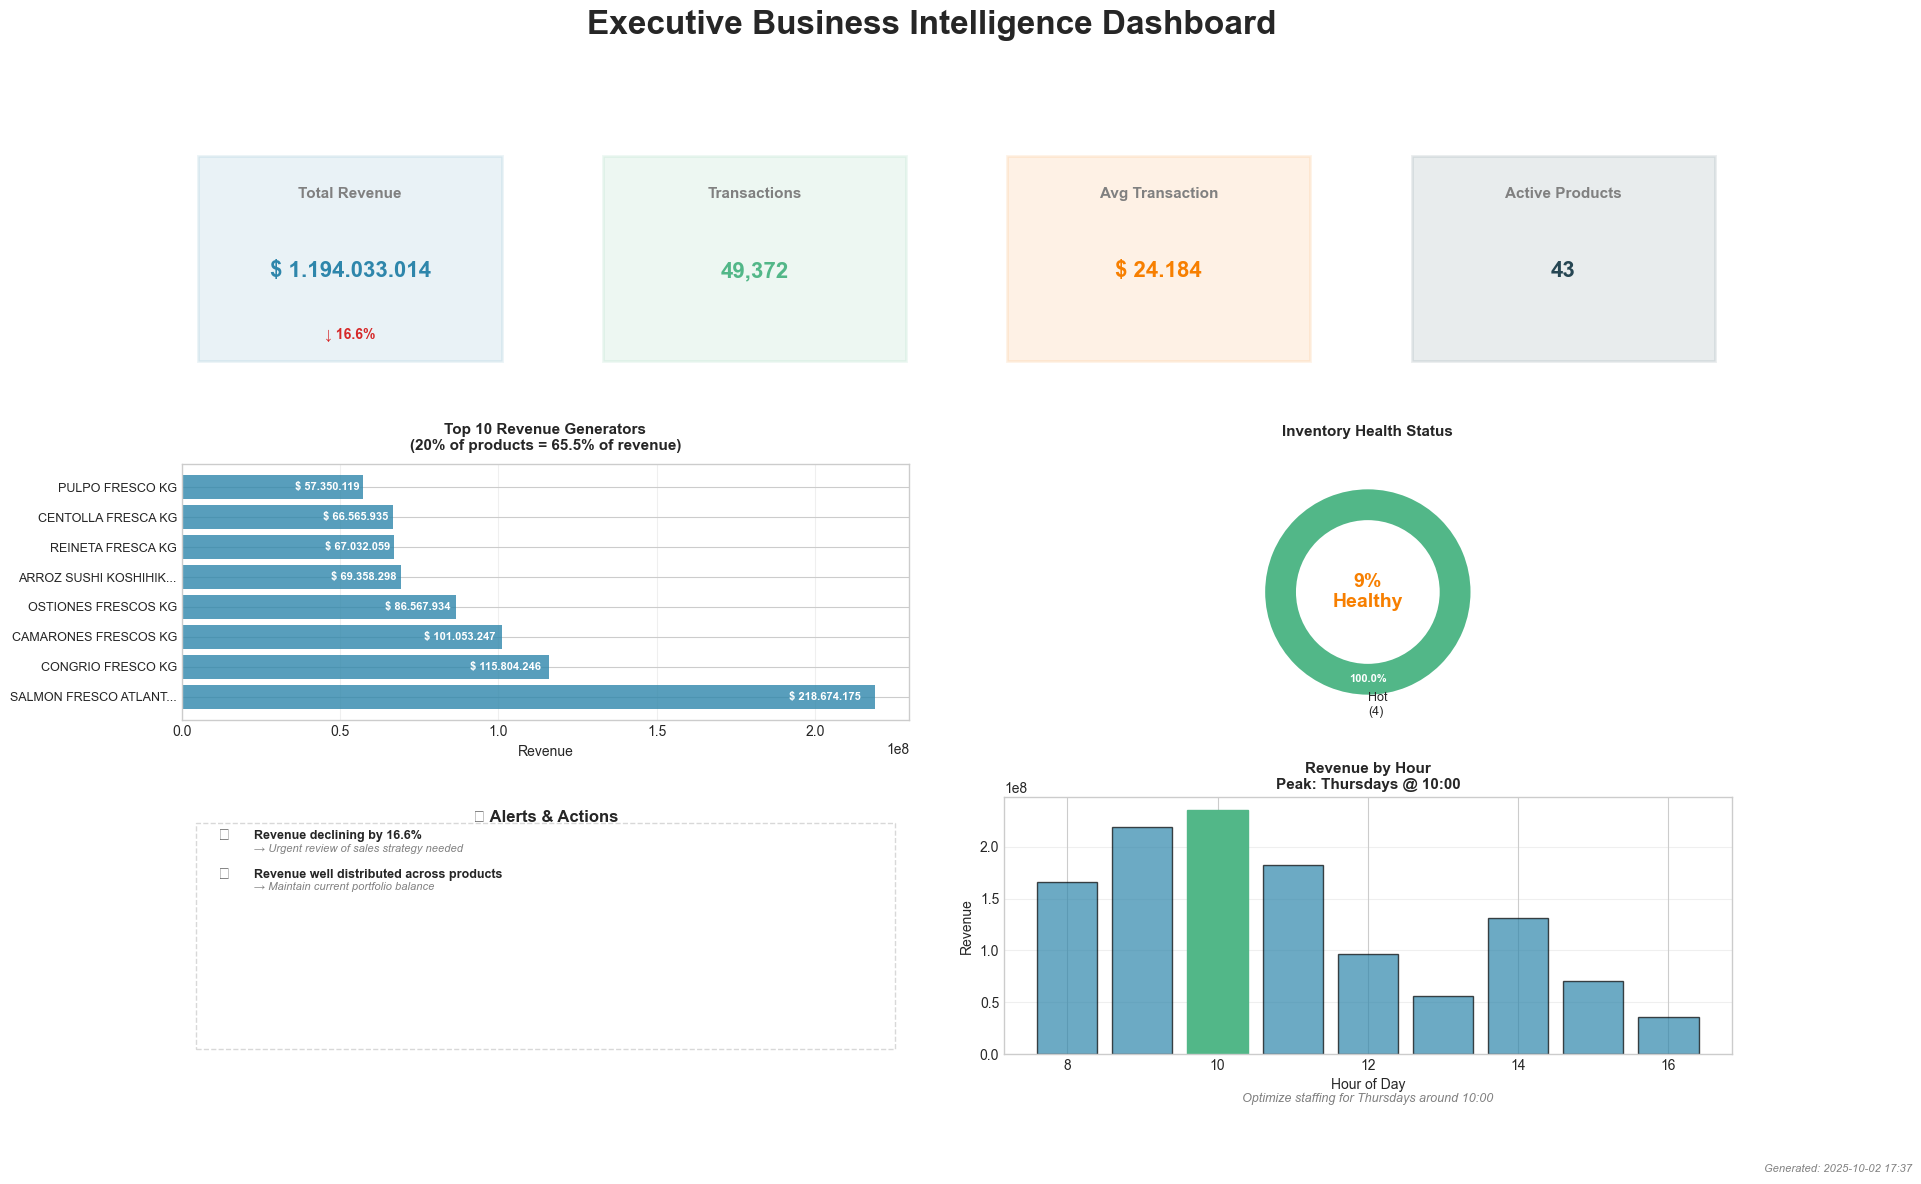

In [9]:
# Create and display the executive dashboard
fig = dashboard.create_full_dashboard(figsize=(20, 12))
print_fig(fig, dashboard.analyzer.out_dir, fn('DASH', 'executive', 'png'), save=save)

## 📈 Trend Analysis
*Historical patterns and trajectory analysis*

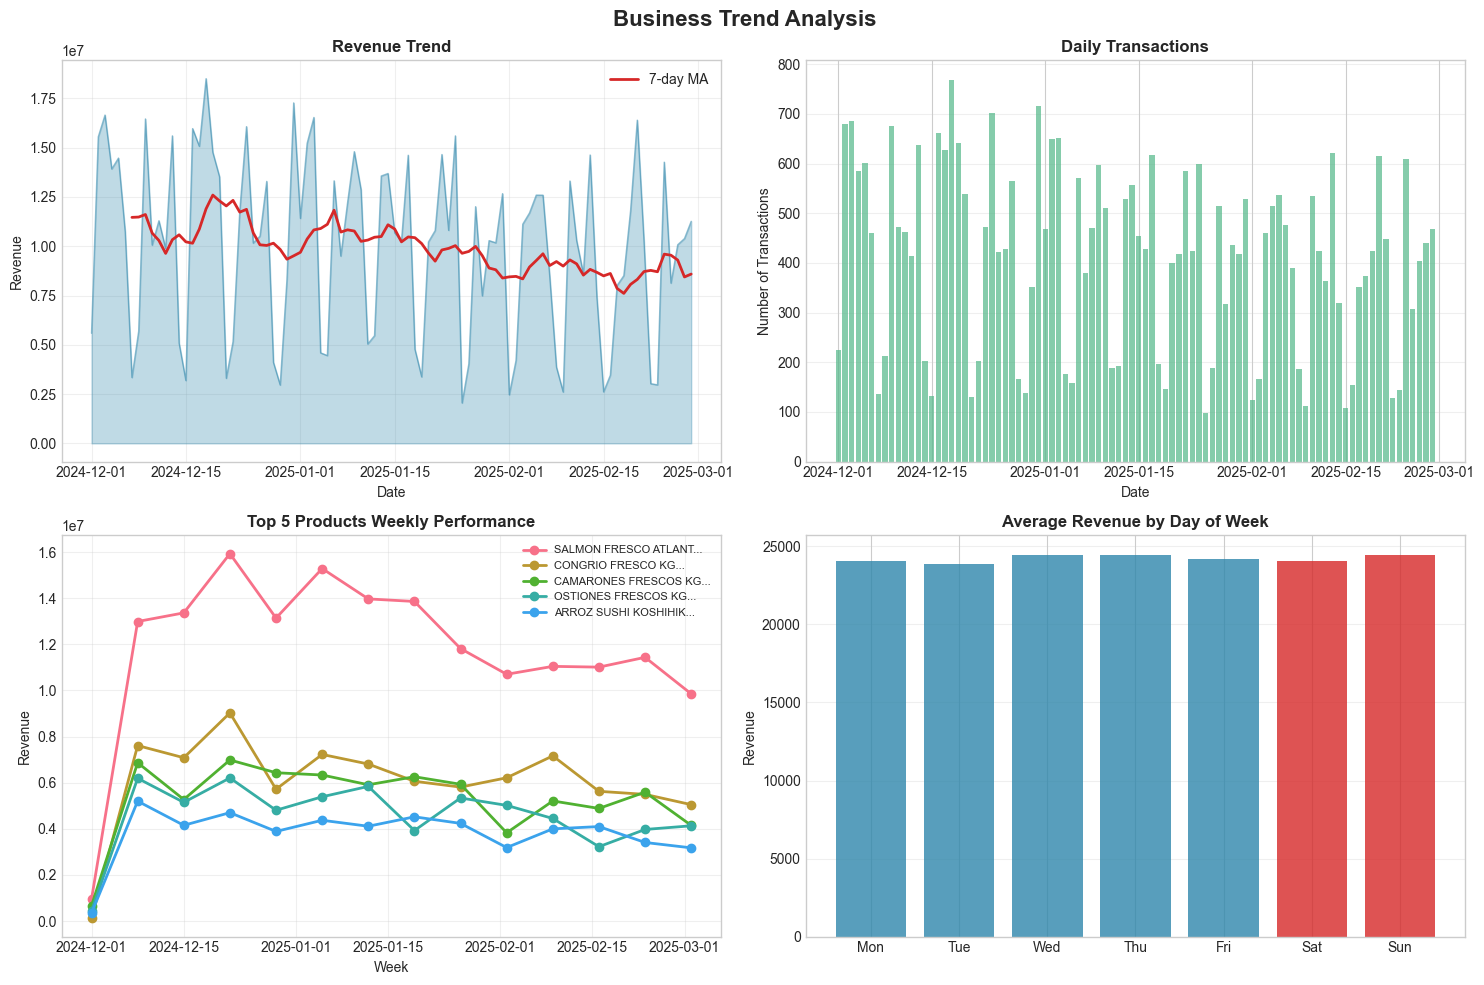

In [10]:
trend_fig = advanced.create_trend_analysis(figsize=(15, 10))
print_fig(trend_fig, dashboard.analyzer.out_dir, fn('DASH', 'trend', 'png'), save=save)

## 🚀 Product Velocity Matrix
*Sales frequency vs. revenue contribution analysis*

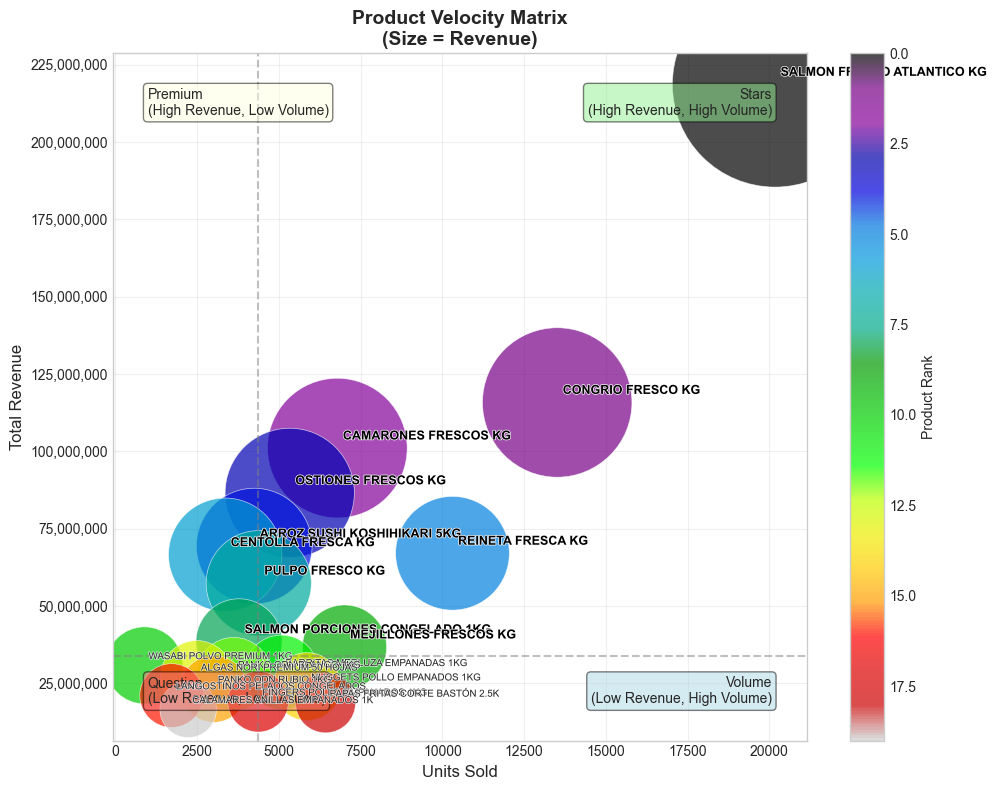

In [11]:
velocity_fig = product_velocity_matrix(analyzer)
print_fig(velocity_fig, dashboard.analyzer.out_dir, fn('DASH', 'velocity', 'png'), save=save)

# 🔬 Advanced Analytics
*Forecasting, cross-sell, anomalies, and AI recommendations*

## 📈 Revenue Forecast
*30-day revenue projection based on historical trends*

In [12]:
forecast = advanced.calculate_revenue_forecast(days_ahead=30)
print_info(advanced.print_revenue_forecast(), analyzer.out_dir, fn('AV', 'forecast'), save=save)

📈 Revenue Forecast for next 30 days:
 Daily:
 - Average: $ 8.587.831
 - Std Dev: $ 4.489.709
 - 95% Confidence Interval: ($ 0, $ 17.387.660)
 Total:
 - Forecast: $ 257.634.921
 - 95% Confidence Interval: ($ 0, $ 521.629.806)
 - Trend: Decreasing


## 🛍️ Cross-Sell Opportunities
*Product affinity analysis for bundling strategies*

In [13]:
cross_sell = advanced.calculate_cross_sell_opportunities(limit=3)
print_info(advanced.print_cross_sell_opportunities(), analyzer.out_dir, fn('AV', 'cross_selling'), save=save)

ℹ️ No significant cross-sell opportunities found.


## ⚠️ Anomaly Detection
*Unusual patterns and outliers requiring investigation*

In [14]:
anomalies = advanced.calculate_anomalies(limit=3)
print_info(advanced.print_anomalies(), analyzer.out_dir, fn('AV', 'anomalies'), save=save)

ℹ️ No anomalies detected.


## 💡 AI-Powered Recommendations
*Data-driven action items for business improvement*

In [15]:
recommendations = advanced.calculate_recommendations()
print_info(advanced.print_recommendations(), analyzer.out_dir, fn('AV', 'recommendations'), save=save)


💡 TOP RECOMMENDATIONS:

1. [HIGH] Address Declining Revenue Trend
   Revenue showing downward trend in recent period
   Action: Review pricing strategy and launch customer retention campaign
   Impact: Stabilize revenue decline | Timeline: Immediate


# 📑 Custom Reports
*Specialized analysis and segmentation reports*

## 📅 Week-over-Week Comparison
*Performance trends and weekly variance analysis*

In [16]:
weekly_comparison_report = weekly_comparison_report(analyzer)
print_info(weekly_comparison_report, analyzer.out_dir, fn('REPORT', 'weekly_compare'), save=save)

WEEKLY COMPARISON REPORT

Revenue:
  Last Week:     $ 68.873.544
  Previous Week: $ 86.282.928
  Change:        🔴 ↓ 20.18%

Transactions:
  Last Week:     2,890
  Previous Week: 3,570
  Change:        🔴 ↓ 19.05%

Products Sold:
  Last Week:     43
  Previous Week: 43
  Change:        🟡 → 0.00%

Avg Transaction:
  Last Week:     $ 23.832
  Previous Week: $ 24.169
  Change:        🟡 ↓ 1.40%


## 👥 Customer Segmentation (RFM) - EXPERIMENTAL
*Recency, Frequency, Monetary value customer classification*

In [17]:
rfm_segmentation = advanced.calculate_customer_segmentation_rfm()
print_info(advanced.print_customer_segmentation(), analyzer.out_dir, fn('AV', 'customer_segmentation'), save=save)

👥 Customer/Transaction Segmentation Analysis

Customer Segments:
  • At Risk: 33 customers
  • High Value Customers: 14 customers
  • Need Attention: 8 customers
  • Recent High Spenders: 4 customers
  • Champions: 1 customers

Total Customers: 60
Avg Recency: 1.6 days
Avg Frequency: 822.9 transactions
Avg Monetary: $ 19.900.550


## 📊 Top Customers by Segment - EXPERIMENTAL
*High-value customers in each RFM category*

In [18]:
detailed_segments = advanced.calculate_detailed_customer_segments(top_n=5)
print_info(advanced.print_detailed_customer_segments(top_n=5), analyzer.out_dir, fn('AV', 'detailed_customer_segments'), save=save)

DETAILED CUSTOMER SEGMENTATION REPORT

┌──────────────────────────────────────────────────────────┐
│ Understanding RFM Scores:                                │
├──────────────────────────────────────────────────────────┤
│ • R (Recency): How recently the customer made a purchase (days ago → segment)│
│ • F (Frequency): How often the customer makes purchases (count → segment)│
│ • M (Monetary): How much money the customer spends (total → segment)│
│                                                          │
│ ℹ️  Segments rank customers: S1 (lowest) to S4 (highest performance)│
└──────────────────────────────────────────────────────────┘


🏆 CHAMPIONS (1 customers)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

#1: R015 - SUSHI EXPRESS ARAUCANIA (Temuco)
    💰 Total Revenue: $ 72.390.440
    📅 Last Purchase: 3 days ago
    🔄 Transactions: 2619 purchases

    📊 RFM Score: R[3d] F[S4] M[S4]

    ✨ Why Champions??
    • High total spending (top tier revenue)
    • High purc

# 📋 Export Summary
*Save comprehensive metrics for historical tracking*

## 💾 CSV Export
*Key metrics saved for trend analysis over time*

In [19]:
# Save executive summary as CSV for easy tracking over time
import pandas as pd

summary_dict = analyzer.get_executive_summary_dict()
summary_df = pd.DataFrame([summary_dict])

if save:
    save_path = os.path.join(analyzer.out_dir, fn('BA', 'executive_summary', 'csv'))
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    summary_df.to_csv(save_path, index=False)
    print(f"✅ Executive summary exported to {save_path}")
else:
    print(summary_df.to_string(index=False))

      Date  Total Revenue  Revenue Growth %  Total Transactions  Top 20% Revenue Share  Dead Stock Count  Inventory Health %
2025-03-01     1194033014        -16.586181               49372               65.52633                 0            9.302326
